<a href="https://colab.research.google.com/github/elso6482/NONE/blob/master/HappinessSurvey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers
X1 = my order was delivered on time
X2 = contents of my order was as I expected
X3 = I ordered everything I wanted to order
X4 = I paid a good price for my order
X5 = I am satisfied with my courier
X6 = the app makes ordering easy for me

In [ ]:
!pip install pycaret 

In [ ]:
!pip install jinja2
!pip install markupsafe==2.0.1

In [1]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

seed=1

In [5]:
happy_customer_data = pd.read_csv('ACME-HappinessSurvey2020.csv')

In [6]:
happy_customer_data.head(5)

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [7]:
happy_customer_data.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


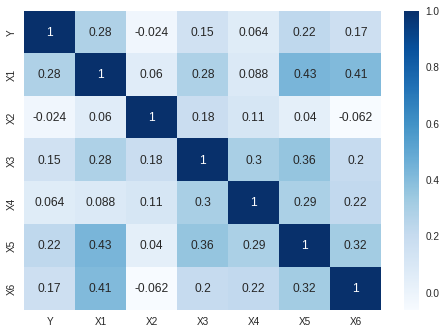

In [8]:
corr = happy_customer_data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='Blues')

Count of happy customer:  69
Count of unhappy customer:  57


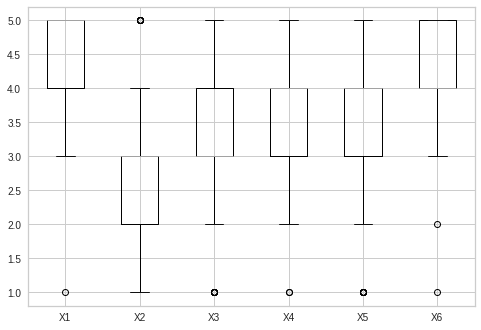

In [9]:
#Check the distribution of Y and the features
happy_customer_data.boxplot(column=['X1', 'X2', 'X3', 'X4','X5','X6'])
print("Count of happy customer: ", len(happy_customer_data[happy_customer_data["Y"]==1]))
print("Count of unhappy customer: ", len(happy_customer_data[happy_customer_data["Y"]==0]))

In [ ]:
single_feature = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']

PC analysis

Variance Ratio  [0.36665419 0.18936275 0.1474559  0.11686753 0.101142   0.07851764]


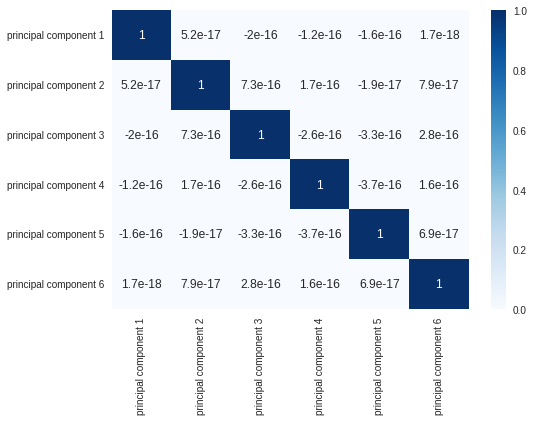

In [42]:
pca = PCA(n_components=6)
features = happy_customer_data.iloc[:,1:7]

scaler = StandardScaler()
scaler.fit(features)
features = scaler.transform(features)
principalComponents = pca.fit_transform(features)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3', 'principal component 4','principal component 5', 'principal component 6'])
corr_p = principalDf.corr()
sns.heatmap(corr_p, xticklabels=corr_p.columns, yticklabels=corr_p.columns, annot=True, cmap='Blues')
print("Variance Ratio ", pca.explained_variance_ratio_)

#Create a dataset which is transformed via PCA
happy_customer_data_PCA = pd.concat([principalDf, happy_customer_data['Y']], axis = 1)
#Create a dataset which drops the minimum number of principal components and retains at least 90% of the variance
happy_customer_data_PCA_drop = happy_customer_data_PCA.drop(columns=['principal component 6'])

In [56]:
from pycaret.classification import *
#set up a session and search for the best models based on accuracy
s1 = setup(happy_customer_data, target='Y', session_id = seed)
top3 = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6722,0.7325,0.725,0.6375,0.6708,0.3250,0.3459,0.483
et,Extra Trees Classifier,0.6611,0.7419,0.705,0.6292,0.6534,0.3018,0.3227,0.465
dt,Decision Tree Classifier,0.6278,0.6175,0.710,0.6362,0.6647,0.2361,0.2386,0.018
svm,SVM - Linear Kernel,0.6153,0.0000,0.655,0.6794,0.6372,0.2155,0.2312,0.015
gbc,Gradient Boosting Classifier,0.6139,0.6800,0.635,0.6038,0.6131,0.2060,0.2092,0.073
knn,K Neighbors Classifier,0.6125,0.6881,0.820,0.5994,0.6877,0.2131,0.2285,0.119
lr,Logistic Regression,0.5819,0.5950,0.630,0.6421,0.6037,0.1380,0.1340,0.026
lda,Linear Discriminant Analysis,0.5819,0.6575,0.650,0.6406,0.6170,0.1393,0.1428,0.017
lightgbm,Light Gradient Boosting Machine,0.5708,0.7038,0.600,0.6058,0.5809,0.1157,0.1270,0.040
ridge,Ridge Classifier,0.5694,0.0000,0.605,0.6421,0.5847,0.1130,0.1143,0.015


Now we can try the top 3 classifiers from the list produced by Pycaret


Random Forest Classifier

In [57]:
rf = create_model('rf') 
optimized_rf = optimize_threshold(rf)
evaluate_model(optimized_rf)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8889,0.9500,1.0000,0.8333,0.9091,0.7692,0.7906
1,0.6667,0.7500,1.0000,0.6250,0.7692,0.2703,0.3953
2,0.6667,0.7000,0.8000,0.6667,0.7273,0.3077,0.3162
3,0.5556,0.5250,0.6000,0.6000,0.6000,0.1000,0.1000
4,0.6667,0.5500,0.6000,0.7500,0.6667,0.3415,0.3500
5,0.8889,1.0000,1.0000,0.8333,0.9091,0.7692,0.7906
6,0.4444,0.5500,0.2500,0.3333,0.2857,-0.1538,-0.1581
7,0.4444,0.5500,0.2500,0.3333,0.2857,-0.1538,-0.1581
8,0.8750,1.0000,1.0000,0.8000,0.8889,0.7500,0.7746


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Extra Trees Classifier

In [58]:
et = create_model('et')
optimized_et = optimize_threshold(et)
evaluate_model(optimized_et)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8889,0.9500,1.0000,0.8333,0.9091,0.7692,0.7906
1,0.6667,0.9000,1.0000,0.6250,0.7692,0.2703,0.3953
2,0.6667,0.6500,0.8000,0.6667,0.7273,0.3077,0.3162
3,0.5556,0.5250,0.6000,0.6000,0.6000,0.1000,0.1000
4,0.4444,0.6000,0.4000,0.5000,0.4444,-0.0976,-0.1000
5,0.8889,1.0000,1.0000,0.8333,0.9091,0.7692,0.7906
6,0.4444,0.4750,0.2500,0.3333,0.2857,-0.1538,-0.1581
7,0.5556,0.6000,0.2500,0.5000,0.3333,0.0526,0.0598
8,0.8750,0.9375,1.0000,0.8000,0.8889,0.7500,0.7746


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Decision Tree Classifier

In [59]:
dt = create_model('dt') 

evaluate_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8889,0.9000,0.8000,1.0000,0.8889,0.7805,0.8000
1,0.6667,0.6500,0.8000,0.6667,0.7273,0.3077,0.3162
2,0.6667,0.6500,0.8000,0.6667,0.7273,0.3077,0.3162
3,0.4444,0.4250,0.6000,0.5000,0.5455,-0.1538,-0.1581
4,0.3333,0.3000,0.6000,0.4286,0.5000,-0.4211,-0.4781
5,0.8889,0.8750,1.0000,0.8333,0.9091,0.7692,0.7906
6,0.2222,0.2250,0.2500,0.2000,0.2222,-0.5366,-0.5500
7,0.6667,0.6500,0.5000,0.6667,0.5714,0.3077,0.3162
8,0.8750,0.8750,1.0000,0.8000,0.8889,0.7500,0.7746


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [60]:
top3

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                        warm_start=False),
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                    

Stacking model

In [61]:
#try stacking classifier with top 3 models selected from pycaret
stack = stack_models(top3) 

stack 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4444,0.7000,0.400,0.5000,0.4444,-0.0976,-0.1000
1,0.4444,0.5000,0.800,0.5000,0.6154,-0.2162,-0.3162
2,0.5556,0.7000,0.400,0.6667,0.5000,0.1429,0.1581
3,0.5556,0.4000,0.800,0.5714,0.6667,0.0526,0.0598
4,0.6667,0.7000,0.600,0.7500,0.6667,0.3415,0.3500
5,0.6667,0.7000,1.000,0.6250,0.7692,0.2703,0.3953
6,0.4444,0.6000,0.250,0.3333,0.2857,-0.1538,-0.1581
7,0.6667,0.6000,0.500,0.6667,0.5714,0.3077,0.3162
8,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000


StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                        

Soft Voting / Majority Rule classifier

In [62]:
#try Majority Rule classifier with top 3 models selected from pycaret
blender = blend_models(top3)
blender 


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.6667,0.8500,0.8000,0.6667,0.7273,0.3077,0.3162
2,0.6667,0.6500,0.8000,0.6667,0.7273,0.3077,0.3162
3,0.4444,0.4750,0.6000,0.5000,0.5455,-0.1538,-0.1581
4,0.3333,0.5500,0.6000,0.4286,0.5000,-0.4211,-0.4781
5,0.8889,1.0000,1.0000,0.8333,0.9091,0.7692,0.7906
6,0.3333,0.3500,0.2500,0.2500,0.2500,-0.3500,-0.3500
7,0.6667,0.6500,0.5000,0.6667,0.5714,0.3077,0.3162
8,0.8750,1.0000,1.0000,0.8000,0.8889,0.7500,0.7746


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
        

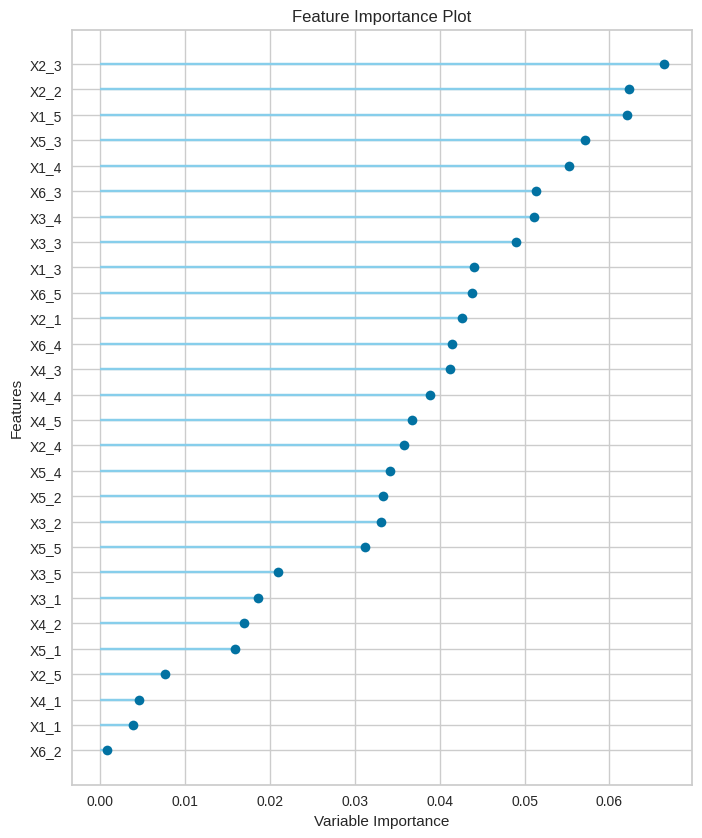

In [65]:
plot_model(rf, plot = 'feature_all')
plot_model(et, plot = 'feature_all')
plot_model(dt, plot = 'feature_all')


Find the best model for the dataset with PCA transformed features

In [45]:
s2 = setup(happy_customer_data_PCA, target='Y', session_id = seed)
best_3_PCA = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6694,0.7144,0.710,0.6942,0.6822,0.3266,0.3508,0.525
gbc,Gradient Boosting Classifier,0.6222,0.6675,0.670,0.6608,0.6508,0.2374,0.2609,0.106
ada,Ada Boost Classifier,0.6111,0.5875,0.690,0.6405,0.6568,0.2066,0.2125,0.170
rf,Random Forest Classifier,0.6028,0.6238,0.695,0.6158,0.6444,0.1896,0.2121,0.575
lr,Logistic Regression,0.5931,0.6812,0.605,0.5967,0.5851,0.1682,0.1550,0.345
ridge,Ridge Classifier,0.5931,0.0000,0.605,0.5967,0.5851,0.1682,0.1550,0.029
lda,Linear Discriminant Analysis,0.5931,0.6762,0.605,0.5967,0.5851,0.1682,0.1550,0.024
knn,K Neighbors Classifier,0.5889,0.5981,0.680,0.6107,0.6301,0.1827,0.1769,0.136
nb,Naive Bayes,0.5792,0.6462,0.670,0.6079,0.6299,0.1449,0.1392,0.029
svm,SVM - Linear Kernel,0.5694,0.0000,0.495,0.6017,0.5305,0.1302,0.1350,0.030


In [16]:
et_PCA = create_model('et') 
evaluate_model(et_PCA)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7778,0.8500,0.800,0.8000,0.8000,0.5500,0.5500
1,0.6667,0.7500,1.000,0.6250,0.7692,0.2703,0.3953
2,0.6667,0.6500,0.800,0.6667,0.7273,0.3077,0.3162
3,0.5556,0.5250,0.600,0.6000,0.6000,0.1000,0.1000
4,0.5556,0.6250,0.400,0.6667,0.5000,0.1429,0.1581
5,0.8889,0.9000,1.000,0.8333,0.9091,0.7692,0.7906
6,0.7778,0.8000,0.500,1.0000,0.6667,0.5263,0.5976
7,0.5556,0.4500,0.500,0.5000,0.5000,0.1000,0.1000
8,0.7500,0.8750,0.750,0.7500,0.7500,0.5000,0.5000


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [47]:
#try Majority Rule classifier with top 3 models selected from pycaret
blender_PCA = blend_models(best_3_PCA)
blender_PCA

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8889,0.9000,0.8000,1.0000,0.8889,0.7805,0.8000
1,0.6667,0.6500,1.0000,0.6250,0.7692,0.2703,0.3953
2,0.5556,0.6000,0.6000,0.6000,0.6000,0.1000,0.1000
3,0.4444,0.4500,0.6000,0.5000,0.5455,-0.1538,-0.1581
4,0.6667,0.8500,0.6000,0.7500,0.6667,0.3415,0.3500
5,0.8889,0.8500,1.0000,0.8333,0.9091,0.7692,0.7906
6,0.8889,0.8000,0.7500,1.0000,0.8571,0.7692,0.7906
7,0.4444,0.4500,0.5000,0.4000,0.4444,-0.0976,-0.1000
8,0.7500,0.7500,0.7500,0.7500,0.7500,0.5000,0.5000


VotingClassifier(estimators=[('et',
                              ExtraTreesClassifier(bootstrap=False,
                                                   ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                 

In [48]:
#try stacking classifier with top 3 models selected from pycaret
stack_PCA = stack_models(best_3_PCA) 

stack_PCA 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7778,0.7000,0.8000,0.8000,0.8000,0.5500,0.5500
1,0.4444,0.3500,0.8000,0.5000,0.6154,-0.2162,-0.3162
2,0.6667,0.6500,0.6000,0.7500,0.6667,0.3415,0.3500
3,0.4444,0.6500,0.6000,0.5000,0.5455,-0.1538,-0.1581
4,0.4444,0.7000,0.4000,0.5000,0.4444,-0.0976,-0.1000
5,0.7778,0.8000,0.8000,0.8000,0.8000,0.5500,0.5500
6,0.5556,0.7000,0.7500,0.5000,0.6000,0.1429,0.1581
7,0.4444,0.6000,0.0000,0.0000,0.0000,-0.2162,-0.3162
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


StackingClassifier(cv=5,
                   estimators=[('et',
                                ExtraTreesClassifier(bootstrap=False,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight

Find the best model for the dataset with principal components contain at least 90% of the variance 

In [51]:
s3 = setup(happy_customer_data_PCA_drop, target='Y', session_id = seed)
best_3_PCA_drop = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6944,0.7200,0.715,0.7125,0.7035,0.3802,0.3985,0.562
qda,Quadratic Discriminant Analysis,0.6361,0.6488,0.660,0.6514,0.6383,0.2556,0.2732,0.026
rf,Random Forest Classifier,0.6250,0.6862,0.720,0.6358,0.6643,0.2402,0.2629,0.553
lr,Logistic Regression,0.6153,0.6712,0.650,0.6438,0.6330,0.2133,0.2202,0.031
lda,Linear Discriminant Analysis,0.6153,0.6612,0.630,0.6471,0.6247,0.2178,0.2236,0.038
gbc,Gradient Boosting Classifier,0.6097,0.6325,0.665,0.6480,0.6408,0.2077,0.2310,0.142
ridge,Ridge Classifier,0.6042,0.0000,0.630,0.6338,0.6174,0.1936,0.2002,0.015
nb,Naive Bayes,0.6014,0.6588,0.690,0.6200,0.6478,0.1868,0.1854,0.017
dt,Decision Tree Classifier,0.5778,0.5775,0.625,0.5420,0.5711,0.1626,0.1597,0.017
ada,Ada Boost Classifier,0.5778,0.5438,0.670,0.5883,0.6251,0.1410,0.1416,0.162


In [44]:
et_PCA_drop = create_model('et')
optimized_et_PCA_drop = optimize_threshold(et_PCA_drop)
evaluate_model(optimized_et_PCA_drop)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7778,0.900,0.8000,0.8000,0.8000,0.5500,0.5500
1,0.6667,0.650,1.0000,0.6250,0.7692,0.2703,0.3953
2,0.5556,0.625,0.6000,0.6000,0.6000,0.1000,0.1000
3,0.5556,0.675,0.6000,0.6000,0.6000,0.1000,0.1000
4,0.5556,0.600,0.4000,0.6667,0.5000,0.1429,0.1581
5,0.8889,0.900,1.0000,0.8333,0.9091,0.7692,0.7906
6,0.8889,0.750,0.7500,1.0000,0.8571,0.7692,0.7906
7,0.5556,0.475,0.5000,0.5000,0.5000,0.1000,0.1000
8,1.0000,1.000,1.0000,1.0000,1.0000,1.0000,1.0000


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [52]:
#try Majority Rule classifier with top 3 models selected from pycaret
blender_PCA_drop = blend_models(best_3_PCA_drop)
blender_PCA_drop

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.8500,0.8000,0.6667,0.7273,0.3077,0.3162
1,0.6667,0.7000,1.0000,0.6250,0.7692,0.2703,0.3953
2,0.5556,0.7000,0.6000,0.6000,0.6000,0.1000,0.1000
3,0.5556,0.6000,0.6000,0.6000,0.6000,0.1000,0.1000
4,0.4444,0.6500,0.4000,0.5000,0.4444,-0.0976,-0.1000
5,0.7778,0.8500,0.8000,0.8000,0.8000,0.5500,0.5500
6,0.7778,0.7500,0.7500,0.7500,0.7500,0.5500,0.5500
7,0.5556,0.4000,0.5000,0.5000,0.5000,0.1000,0.1000
8,0.8750,0.9375,0.7500,1.0000,0.8571,0.7500,0.7746


VotingClassifier(estimators=[('et',
                              ExtraTreesClassifier(bootstrap=False,
                                                   ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                 

In [53]:
#try stacking classifier with top 3 models selected from pycaret
stack_PCA_drop = stack_models(best_3_PCA_drop) 

stack_PCA_drop 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.8000,0.6000,0.7500,0.6667,0.3415,0.3500
1,0.4444,0.4500,0.6000,0.5000,0.5455,-0.1538,-0.1581
2,0.5556,0.6500,0.4000,0.6667,0.5000,0.1429,0.1581
3,0.4444,0.6000,0.6000,0.5000,0.5455,-0.1538,-0.1581
4,0.5556,0.7000,0.4000,0.6667,0.5000,0.1429,0.1581
5,0.7778,0.8000,0.8000,0.8000,0.8000,0.5500,0.5500
6,0.5556,0.7500,0.7500,0.5000,0.6000,0.1429,0.1581
7,0.6667,0.5000,0.5000,0.6667,0.5714,0.3077,0.3162
8,0.7500,1.0000,0.5000,1.0000,0.6667,0.5000,0.5774


StackingClassifier(cv=5,
                   estimators=[('et',
                                ExtraTreesClassifier(bootstrap=False,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight

With PCA transformation and dropping out the component with least variance, the Extra Trees Classifier has around 70% accuracy for the happiness survey dataset